# Experimentación con datos reales

In [1]:
# Imports
import subprocess
import pandas as pd # un clasicos
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
DATA_DIR = "../data/"
NBA_SCORES = DATA_DIR + "nba_2016_scores.dat"
ATP_SCORES = DATA_DIR + "atp_matches_2015.dat"
NBA_TEAMS = DATA_DIR + "nba_2016_teams.csv"
ATP_NAMES = DATA_DIR + "atp_players.csv"
OUT = ".out"
BIN = "../src/tp"
TYPE_WP = "1"
TYPE_CMM = "0"

In [63]:
def run(data: str, typ: str):
    """Runs a program and returns the output"""
    print(f"running {BIN} with input file {data}, type {typ}")
    # in out type
    return subprocess.run([BIN, data, data+OUT, typ])

In [30]:
def read_mn(path: str):
    return pd.read_csv(
        path,
        sep=' ',
        skiprows=2, # la primera row contiene cant teams y cant partidos
        # Headers custom porque el formato de la catedra no lo tiene
        header=None,
        names=["date", "team1", "score1", "team2", "score2"],
    )

def read_ranking(path: str):
    return pd.read_csv(
        path,
        sep=' ',
        header=None,
        names=["rating"],
    )

## Levantar los datos

In [64]:
run(NBA_SCORES, TYPE_CMM)

running ../src/tp with input file ../data/nba_2016_scores.dat, type 0


CompletedProcess(args=['../src/tp', '../data/nba_2016_scores.dat', '../data/nba_2016_scores.dat.out', '0'], returncode=0)

In [55]:
ranking = read_ranking(NBA+OUT)
names = pd.read_csv(NBA_TEAMS, sep=',', header=None, names=["idx", "name"])
names.head()

# map https://stackoverflow.com/questions/59180942/pandas-mapping-one-column-values-using-other-dataframe-column
ranking['names'] = (ranking.index + 1).map(names.set_index("idx")["name"])
ranking.sort_values("rating")

,rating,names
22,0.150813,Philadelphia
13,0.236722,LA_Lakers
2,0.290736,Brooklyn
23,0.298952,Phoenix
17,0.319984,Minnesota
18,0.384521,New_Orleans
25,0.412817,Sacramento
19,0.414393,New_York
7,0.420858,Denver
21,0.432244,Orlando


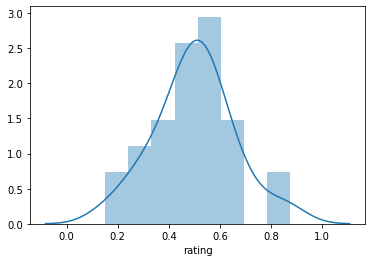

In [58]:
sns.distplot(ranking["rating"])

In [67]:
run(ATP_SCORES, TYPE_CMM)
# ranking = read_ranking(ATP+OUT)
# ranking

running ../src/tp with input file ../data/atp_matches_2015.dat, type 0


CompletedProcess(args=['../src/tp', '../data/atp_matches_2015.dat', '../data/atp_matches_2015.dat.out', '0'], returncode=-11)

In [ ]:
names = pd.read_csv(NBA_TEAMS, sep=',', header=None, names=["idx", "name"])
names.head()

# map https://stackoverflow.com/questions/59180942/pandas-mapping-one-column-values-using-other-dataframe-column
ranking['names'] = (ranking.index + 1).map(names.set_index("idx")["name"])
ranking.sort_values("rating")